## Board Exam Result Analysis ##

### Exploratory Data Analysis and Visualization: Saraswati Vidyalaya 10th Board Performance (2020-2022) ###

### Introduction

Saraswati Vidyalaya Secondary and Higher Secondary School, a bastion of education, has undergone a comprehensive analysis of its 10th board performance spanning the years 2020 to 2022. This exploratory journey seeks to unravel patterns, trends, and critical insights into the academic achievements of the students, aiming to inform and guide future strategies for continuous improvement.

### Objective

The primary objective of this analysis is twofold: first, to gain a nuanced understanding of the current performance levels across subjects and years, and second, to formulate strategic recommendations for enhancing overall board exam outcomes in the future.


### EDA & Visualisation

In [1]:
import pandas as pd

In [2]:
result_data = pd.read_excel("C:/Users/azhar/Desktop/Python/Board Result_10th/board_result.xlsx")

In [3]:
result_data.head()

,Sr.no,Student Name,marathi,hindi,english,maths,science,s.science,Total,Percentage,Date
0,1,Nandini Bhujang Gaikwad,77,61,48,47,58,64,308,61.6,March-2020
1,2,Maya Waghaji Bhalerav,62,57,48,51,60,52,282,56.4,March-2020
2,3,Shreya Waghaji Takatode,60,70,35,35,46,51,262,52.4,March-2020
3,4,Shital Digamber Tribhuvan,83,77,68,70,68,72,370,74,March-2020
4,5,Sanghmitra Santosh Anbhure,65,59,37,50,52,61,287,57.4,March-2020


In [4]:
# Check data types and missing values
result_data.info()

# Handle missing values if any
result_data = result_data.dropna()  # This is a simple approach; you may choose a different strategy based on your data

# Confirm that there are no missing values
result_data.isnull().sum()

# Check for any inconsistencies or anomalies in the data
# You may want to check for outliers, unusual values, or errors in the data

# Display the cleaned data
result_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sr.no         157 non-null    int64 
 1   Student Name  157 non-null    object
 2   marathi       157 non-null    object
 3   hindi         157 non-null    object
 4   english       157 non-null    object
 5   maths         157 non-null    object
 6   science       157 non-null    object
 7   s.science     157 non-null    object
 8   Total         157 non-null    object
 9   Percentage    157 non-null    object
 10  Date          157 non-null    object
dtypes: int64(1), object(10)
memory usage: 13.6+ KB


,Sr.no,Student Name,marathi,hindi,english,maths,science,s.science,Total,Percentage,Date
0,1,Nandini Bhujang Gaikwad,77,61,48,47,58,64,308,61.6,March-2020
1,2,Maya Waghaji Bhalerav,62,57,48,51,60,52,282,56.4,March-2020
2,3,Shreya Waghaji Takatode,60,70,35,35,46,51,262,52.4,March-2020
3,4,Shital Digamber Tribhuvan,83,77,68,70,68,72,370,74,March-2020
4,5,Sanghmitra Santosh Anbhure,65,59,37,50,52,61,287,57.4,March-2020


In [5]:
# Convert 'Percentage' column to numeric
result_data['Percentage'] = pd.to_numeric(result_data['Percentage'], errors='coerce')

# Create a function to assign grades
def assign_grade(percentage):
    if percentage >= 75:
        return 'Distinction'
    elif 60 <= percentage < 75:
        return 'First Division'
    elif 45 <= percentage < 60:
        return 'Second Division'
    elif 35 <= percentage < 45:
        return 'Pass'
    else:
        return 'Failed'

# Apply the function to create the 'Grade' column
result_data['Grade'] = result_data['Percentage'].apply(assign_grade)

# Display the updated dataset with the new 'Grade' column
result_data.head()


,Sr.no,Student Name,marathi,hindi,english,maths,science,s.science,Total,Percentage,Date,Grade
0,1,Nandini Bhujang Gaikwad,77,61,48,47,58,64,308,61.6,March-2020,First Division
1,2,Maya Waghaji Bhalerav,62,57,48,51,60,52,282,56.4,March-2020,Second Division
2,3,Shreya Waghaji Takatode,60,70,35,35,46,51,262,52.4,March-2020,Second Division
3,4,Shital Digamber Tribhuvan,83,77,68,70,68,72,370,74.0,March-2020,First Division
4,5,Sanghmitra Santosh Anbhure,65,59,37,50,52,61,287,57.4,March-2020,Second Division


In [6]:
# Save the DataFrame to an Excel file
result_data.to_excel('result_data_with_grade.xlsx', index=False)


### Subject-wise Average Marks

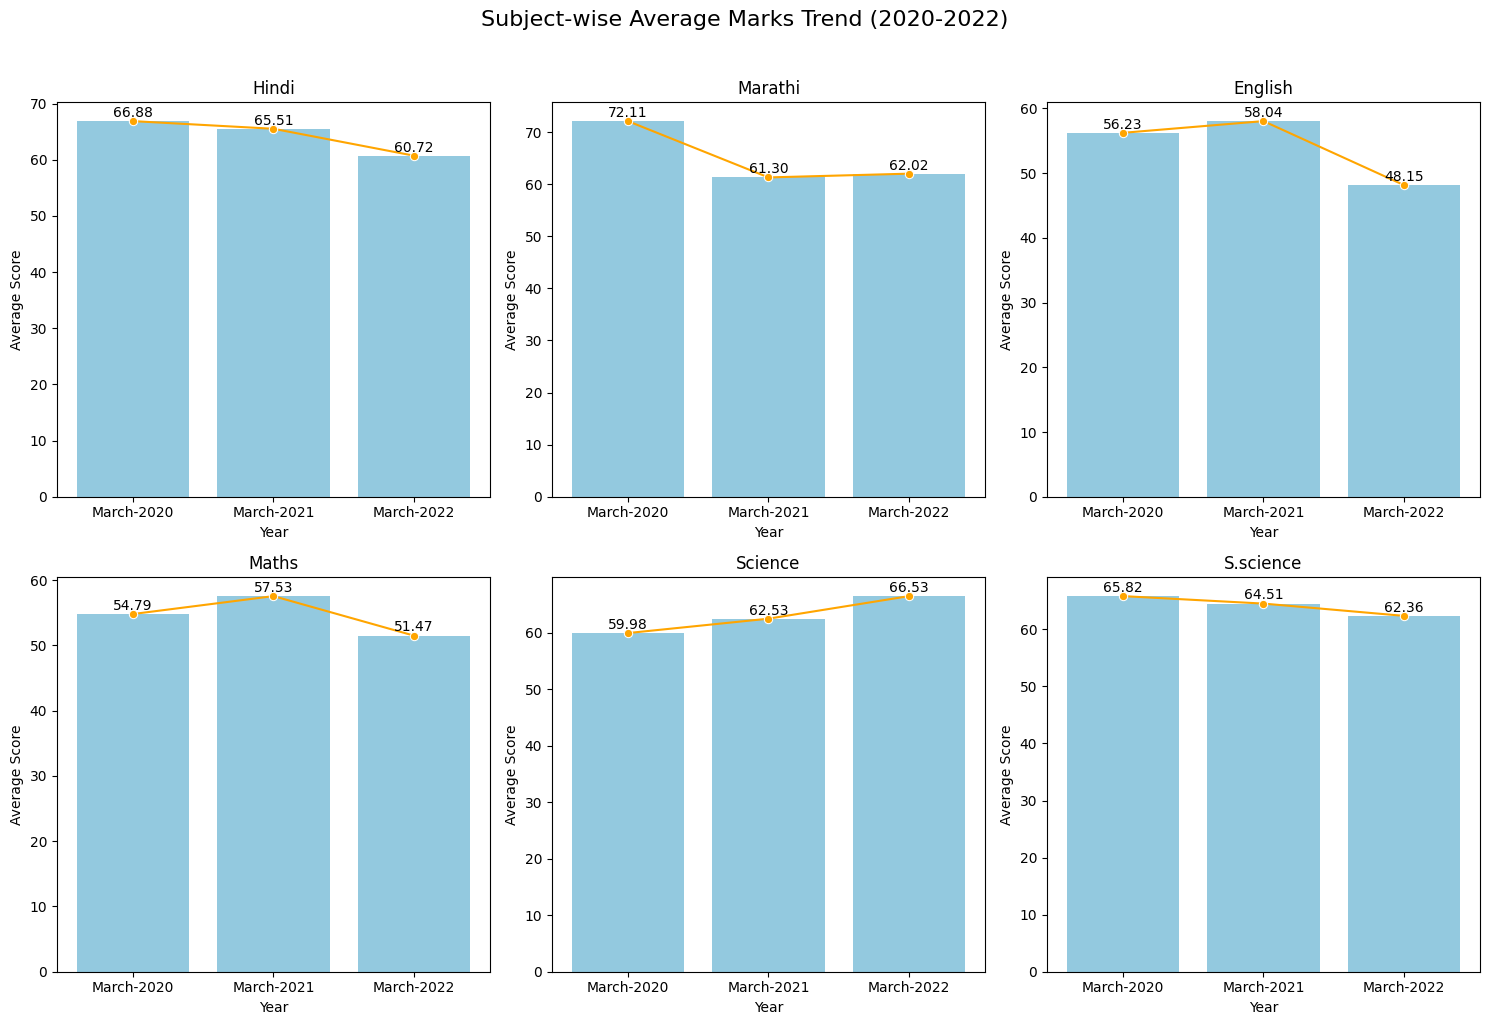

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of subjects to visualize
subjects = ['hindi', 'marathi', 'english', 'maths', 'science', 's.science']

# Convert columns to numeric and handle missing values
result_data[subjects] = result_data[subjects].apply(pd.to_numeric, errors='coerce')

# Plot combined visualizations for each subject
plt.figure(figsize=(15, 10))
plt.suptitle('Subject-wise Average Marks Trend (2020-2022)', fontsize=16, y=1.02)

for i, subject in enumerate(subjects, 1):
    plt.subplot(2, 3, i)
    subject_data = result_data[[subject, 'Date']]
    avg_scores = subject_data.groupby('Date')[subject].mean().reset_index()

    sns.barplot(x='Date', y=subject, data=avg_scores, color='skyblue')
    sns.lineplot(x='Date', y=subject, data=avg_scores, color='orange', marker='o')

    plt.title(f'{subject.capitalize()}')
    plt.xlabel('Year')
    plt.ylabel('Average Score')

    # Add data labels
    for index, value in enumerate(avg_scores[subject]):
        plt.text(index, value + 0.2, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


#### Observation:

**Science Shows Steady Improvement:**
The trend line for Science exhibits a consistent upward trajectory from 2020 to 2022, indicating a steady improvement in the average scores of students in this subject over the three years.

**Maths and English Rise in 2021, Followed by a Decline:**
Both Maths and English demonstrate a rise in average scores in 2021 compared to 2020. However, this positive trend is followed by a decline in average scores in 2022, with the scores even lower than those observed in 2020.

**General Decline in Other Subjects:**
For subjects Marathi, Hindi, and Social Science, there is a general downward movement in average scores over the three years. The overall trend shows a decrease in average scores when comparing 2022 to 2020.
2 to 2020.

### Average Percentage

#### Count of Students Above & Below the Average Percentage For Each Year

            Total Students  Average Percentage  Above Avg Count  \
Date                                                              
March-2020              57           65.392857               32   
March-2021              47           63.312340               19   
March-2022              53           62.620408               23   

            Below Avg Count  
Date                         
March-2020               24  
March-2021               28  
March-2022               26  


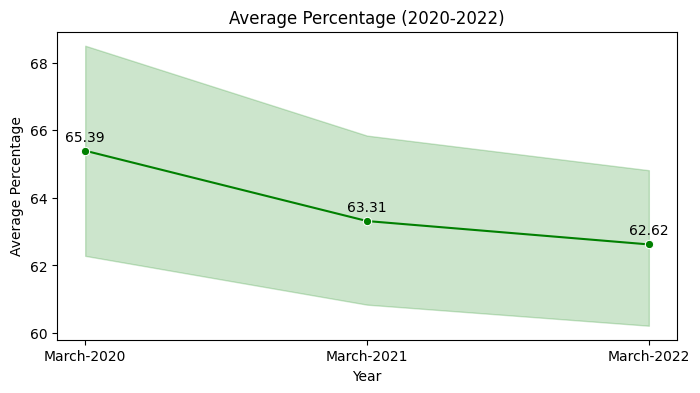

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the 'Percentage' column to numeric (if not)

result_data['Percentage'] = pd.to_numeric(result_data['Percentage'], errors='coerce')

# Calculate average percentage for each year
avg_percentage_by_year = result_data.groupby('Date')['Percentage'].mean()

# Count students above and below average percentage for each year
result_data['Above_Avg_Percentage'] = result_data['Percentage'] > avg_percentage_by_year.mean()
result_data['Below_Avg_Percentage'] = result_data['Percentage'] < avg_percentage_by_year.mean()

above_avg_count_by_year = result_data.groupby('Date')['Above_Avg_Percentage'].sum()
below_avg_count_by_year = result_data.groupby('Date')['Below_Avg_Percentage'].sum()

# Calculate total number of students for each year
total_students_by_year = result_data.groupby('Date').size()

# Display the results in a single table
result_summary = pd.DataFrame({
    'Total Students': total_students_by_year,
    'Average Percentage': avg_percentage_by_year,
    'Above Avg Count': above_avg_count_by_year,
    'Below Avg Count': below_avg_count_by_year
})

# Display the information table
print(result_summary)

# Plot the line chart for average percentage
plt.figure(figsize=(8, 4))
sns.lineplot(x='Date', y='Percentage', data=result_data, marker='o', color='green')

# Add data labels
for index, value in enumerate(avg_percentage_by_year):
    plt.text(index, value + 0.2, f'{value:.2f}', ha='center', va='bottom')

plt.title('Average Percentage (2020-2022)')
plt.xlabel('Year')
plt.ylabel('Average Percentage')
plt.show()


#### Observation:

**Downward Trend in Average Percentage:**
The line chart representing the average percentage trend from 2020 to 2022 reveals a consistent downward trajectory. The average percentage of students appears to decrease steadily over the three years, indicating a declining overall performance during this period.


### Grade Distribuion

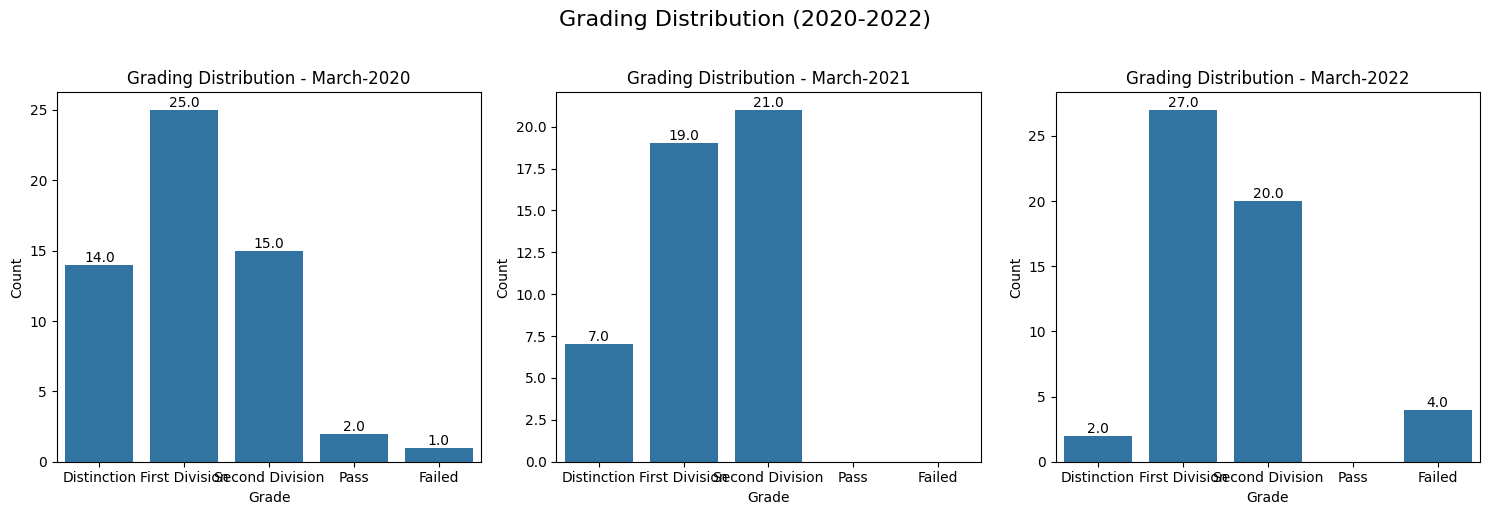

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the bar chart for grading distribution
plt.figure(figsize=(15, 5))
plt.suptitle('Grading Distribution (2020-2022)', fontsize=16, y=1.02)

# List of years to visualize
years = ['March-2020', 'March-2021', 'March-2022']

for i, year in enumerate(years, 1):
    plt.subplot(1, 3, i)
    ax = sns.countplot(x='Grade', data=result_data[result_data['Date'] == year], order=['Distinction', 'First Division', 'Second Division', 'Pass', 'Failed'])

    # Add data labels
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

    plt.title(f'Grading Distribution - {year}')
    plt.xlabel('Grade')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


#### Percentage of Overall School Result For Each Year In Board Exam

In [10]:
import pandas as pd

# List of years to analyze
years = ['2020', '2021', '2022']

# Create a list to store the results
results_list = []

for year in years:
    # Filter data for the specific year
    year_data = result_data[result_data['Date'].str.contains(year)]
    
    # Calculate the percentage of students in each grade
    total_students = len(year_data)
    grade_counts = year_data['Grade'].value_counts()
    
    for grade, count in grade_counts.items():
        percentage = (count / total_students) * 100
        results_list.append({'Year': year, 'Grade': grade, 'Percentage': percentage})

# Convert the list to a DataFrame
results_df = pd.DataFrame(results_list)

# Calculate overall result for each year
overall_results_list = []

for year in years:
    year_data = result_data[result_data['Date'].str.contains(year)]
    total_students = len(year_data)
    pass_percentage = (len(year_data[year_data['Grade'].isin(['Distinction', 'First Division', 'Second Division', 'Pass'])]) / total_students) * 100
    overall_results_list.append({'Year': year, 'Overall Percentage': pass_percentage})

# Convert the list to a DataFrame
overall_results = pd.DataFrame(overall_results_list)

# Pivot the results_df to create a table with grades as rows and years as columns
pivot_table = results_df.pivot_table(index='Grade', columns='Year', values='Percentage', fill_value=0)

# Display the results
print("Percentage of Students Passed in Each Grade:")
print(pivot_table)

print("\nOverall School Result for Each Year:")
print(overall_results)


Percentage of Students Passed in Each Grade:
Year                  2020       2021       2022
Grade                                           
Distinction      24.561404  14.893617   3.773585
Failed            1.754386   0.000000   7.547170
First Division   43.859649  40.425532  50.943396
Pass              3.508772   0.000000   0.000000
Second Division  26.315789  44.680851  37.735849

Overall School Result for Each Year:
   Year  Overall Percentage
0  2020           98.245614
1  2021          100.000000
2  2022           92.452830


#### Observation:

1. **Significant Decline in Distinction Achievers:**
   - In the year 2020, approximately 25% of students achieved the Distinction grade, showcasing a commendable performance.
   - However, there has been a noticeable and substantial decline in the number of students receiving Distinction.
   - In 2021, the percentage dropped to around 15%, and further decreased to just about 3% in 2022.

2. **Impact of Pandemic Policies in 2021:**
   - The unprecedented challenges posed by the COVID-19 pandemic led to exceptional measures in the 2021 board exams.
   - Notably, there were no students reported as 'Failed' in 2021, reflecting the government's policy to accommodate the difficult circun the coming years.


## Findings

- **Subject-wise Trends (2020-2022):**
  - Science exhibits steady improvement, while Maths and English show fluctuations.
  - Maths and English saw a rise in 2021 but a decline in 2022.

- **Grading Distribution:**
  - Distinction achievement declines from 25% (2020) to 3% (2022).
  - No 'Failed' students reported in 2021 due to pandemic policies.

- **Overall Board Performance:**
  - Overall board results remain high, with variations in Distinction percentages.

- **Average Percentage Trend (2020-2022):**
  - Average percentage shows a steady decline from 2020 to 2022.


## Recommendations for Future Board Exam Performance:

1. **Strengthen Science Education:**
   - The consistent improvement in Science scores from 2020 to 2022 indicates a positive trend. Encourage and enhance the Science curriculum to maintain and further improve performance in this subject.

2. **Address Decline in Maths and English:**
   - Although there was a rise in average scores for Maths and English in 2021, there was a subsequent decline in 2022. Implement targeted interventions, tutoring programs, or curriculum adjustments to address the decrease and ensure sustained improvement.

3. **Subject-Specific Workshops and Resources:**
   - Conduct subject-specific workshops and provide additional resources for Marathi, Hindi, and Social Science subjects. The general decline in these subjects indicates a need for focused attention and support.

4. **Individualized Student Support:**
   - Identify students struggling in specific subjects early on and provide individualized support. Tailored assistance, such as tutoring or additional study materials, can help students overcome challenges and improve their performance.

5. **Grading System Awareness:**
   - Enhance awareness and understanding of the grading system among students and parents. This can be achieved through workshops, informational sessions, or educational materials to ensure clarity and transparency in the evaluation process.

6. **Continuous Monitoring and Feedback:**
   - Establish a system for continuous monitoring of student performance throughout the academic year. Regular feedback on assessments can help students identify areas of improvement and take corrective actions in a timely manner.

7. **Curriculum Alignment:**
   - Regularly review and align the curriculum with the latest educational standards. Ensuring that the curriculum reflects current requirements can contribute to better student preparation for board exams.

8. **Technology Integration:**
   - Explore the integration of technology in the teaching and learning process. Interactive online resources, educational apps, and digital platforms can engage students and make learning more accessible and enjoyable.

9. **Exam Preparedness Workshops:**
   - Conduct exam preparedness workshops to familiarize students with the examination format, time management strategies, and effective study techniques. This can help alleviate exam-related stress and enhance performance.

10. **Celebrate Achievements and Progress:**
    - Acknowledge and celebrate both individual and collective achievements. Recognizing student accomplishments boosts motivation and fosters a positive learning environment.

These recommendations aim to address specific areas of improvement while leveraging successful aspects of the current educational system. Implementing a comprehensive strategy that considers both student and subject needs wExam ill contribute to overall board performance enhancement.


### Thank You!